In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing datasets
df_isear = pd.read_csv("isear.csv", sep= "|", engine='python', error_bad_lines=False, quoting=csv.QUOTE_NONE,warn_bad_lines=False)
df_wassa = pd.read_csv("emotion-labels-train.csv")
df_isear = df_isear[["SIT","Field1"]]
print('ISEAR dataset size:',df_isear.shape)
print('WASSA dataset size:',df_wassa.shape)

ISEAR dataset size: (7503, 2)
WASSA dataset size: (3613, 2)


In [3]:
# Renaming ISEAR dataset column names to accurately describe the columns
df_isear.rename(columns={'SIT': 'text', 'Field1': 'label'}, inplace=True)

# Combining datasets
df = pd.concat([df_isear,df_wassa])

# Display new dataset and its size
print('Combined dataset size:', df.shape)
df.sample(10)

Combined dataset size: (11116, 2)


,text,label
2336,@Nigerianscamsss @TrillSmith you think I came ...,anger
509,When I met friends I had not seen for the last...,joy
6174,When I was ditched by my girlfriend.,sadness
4495,When my girlfriend's nephew passed away.,sadness
3587,"I'm so proud he understands this, he shows lov...",sadness
7256,"When I was travelling to school by bus, I went...",disgust
2424,@LaraTheIrish &lt; feel everything. She would ...,anger
1678,"@CestLouLeLoup okay, not dead, but if I were, ...",fear
3007,A sense of guilt before my parents when I had ...,guilt
3043,@TaylaStJames it happens and Vegas isn't the o...,sadness


## Data Visualization

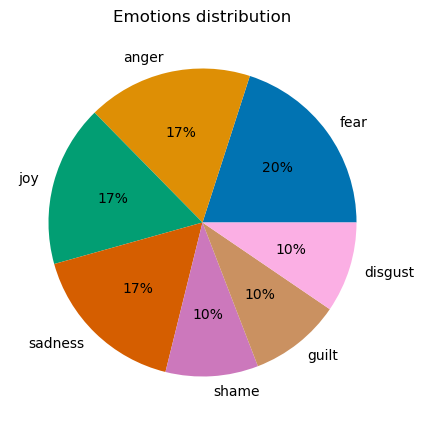

In [4]:
# Creating emotion label pie chart

label_count = df.label.value_counts() / len(df) * 100

# selecting Seaborn color palette to use
palette_color = sns.color_palette('colorblind') 

# plotting data
plt.pie(label_count, labels=label_count.index, colors=palette_color,autopct='%.0f%%')

# title of plot
plt.title("Emotions distribution")
plt.gcf().set_size_inches(5,5)

# displaying chart
plt.show()

In [5]:
label_count

fear       20.025189
anger      17.335372
joy        16.984527
sadness    16.786614
shame       9.724721
guilt       9.625765
disgust     9.517812
Name: label, dtype: float64

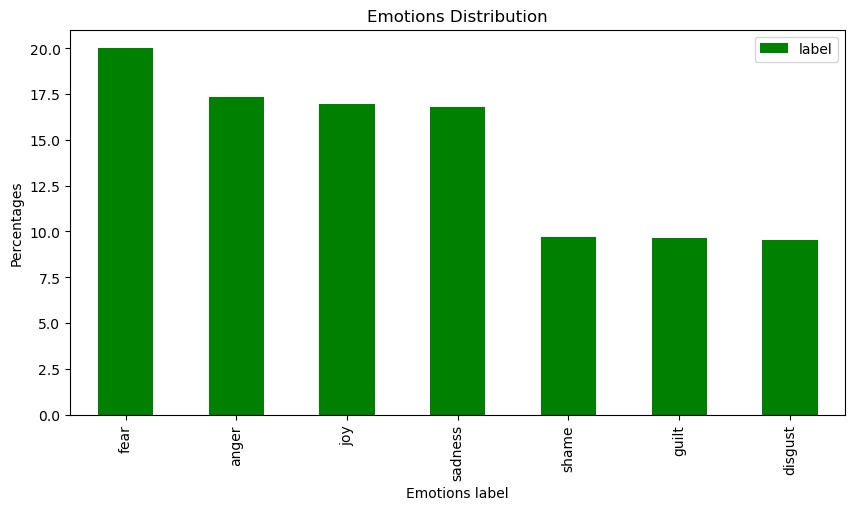

In [6]:
# Creating a bar chart

# convert series to dataframe
label_count_df = label_count.to_frame()
label_count_df.plot(kind='bar',  color= 'green')
 
# labels for x & y axis
plt.xlabel('Emotions label')
plt.ylabel('Percentages')
 
# title of plot
plt.title("Emotions Distribution")
plt.gcf().set_size_inches(10,5)

# Preprocessing Data

In [7]:
# Function to remove twitter mentions and hyperlinks. 
def tweet_UserFilter(text):
    new_text = []
    for user in text.split(' '):
        if len(user) > 0:
            if user[0] == '@' and len(user) > 1:
                pass
            elif user.startswith("https"):
                pass
            else:
                new_text.append(user)
    return ' '.join(new_text)

# define a function to remove special characters, punctuation, and numbers.
def clean_text(text):
    text = re.sub('[^A-Za-z ]+', '', text) # remove special characters
    text = re.sub(r'\d+', '', text) # remove numbers
    text = re.sub(r'\s+', ' ', text) # remove extra whitespaces
    text = text.lower() # convert to lowercase
    return text.strip() # remove extra white space

In [8]:
# Removing unnecessary information
df['prepped_text'] = df['text'].apply(tweet_UserFilter)
df['prepped_text'] = df['prepped_text'].apply(clean_text)

# Removing stop-words from text
df['prepped_text'] = df['prepped_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Tokenization
df['tokens'] = df['prepped_text'].apply(word_tokenize)

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Label Encoding emotions 
le = LabelEncoder()
df['labels_encoded'] = le.fit_transform(df['label'])

In [9]:
# Displaying dataframe
df.sample(10)

,text,label,prepped_text,tokens,lemmatized,labels_encoded
4029,When my father addressed me directly and malic...,anger,father addressed directly maliciously thus inc...,"[father, addressed, directly, maliciously, thu...","[father, addressed, directly, maliciously, thu...",0
5794,When I failed the M.S.C exams.,anger,failed msc exams,"[failed, msc, exams]","[failed, msc, exam]",0
5193,When my beloved uncle was shot dead by relatives.,sadness,beloved uncle shot dead relatives,"[beloved, uncle, shot, dead, relatives]","[beloved, uncle, shot, dead, relative]",5
429,When I crashed my car and it had to be scrappe...,sadness,crashed car scrapped fault feel depressed miss...,"[crashed, car, scrapped, fault, feel, depresse...","[crashed, car, scrapped, fault, feel, depresse...",5
3986,A friend of mine told me that I had passed the...,joy,friend mine told passed entrance exam university,"[friend, mine, told, passed, entrance, exam, u...","[friend, mine, told, passed, entrance, exam, u...",4
482,A gang of screaming and drunk youths \captured...,fear,gang screaming drunk youths captured tram,"[gang, screaming, drunk, youths, captured, tram]","[gang, screaming, drunk, youth, captured, tram]",2
4335,"I received a letter from some friends, who do ...",sadness,received letter friends live madrid telling wo...,"[received, letter, friends, live, madrid, tell...","[received, letter, friend, live, madrid, telli...",5
2285,Candice's pout is gonna take someone eye out m...,anger,candices pout gonna take someone eye mate gbbo,"[candices, pout, gon, na, take, someone, eye, ...","[candices, pout, gon, na, take, someone, eye, ...",0
4052,When I saw a film where a black was rapeing a ...,disgust,saw film black rapeing girl another one filmin...,"[saw, film, black, rapeing, girl, another, one...","[saw, film, black, rapeing, girl, another, one...",1
3913,When a very close friend with whom I have a ve...,anger,close friend intimate bodily relationship girl...,"[close, friend, intimate, bodily, relationship...","[close, friend, intimate, bodily, relationship...",0


In [10]:
# Checking for empty rows
df.isnull().sum()

text              0
label             0
prepped_text      0
tokens            0
lemmatized        0
labels_encoded    0
dtype: int64

In [11]:
# Removing unneccesary columns
df = df[['lemmatized', 'labels_encoded']]
df.sample(7)

,lemmatized,labels_encoded
6085,"[time, cleaned, house, everything, tidy, cousi...",1
4047,"[girl, one, night, call, although, asked]",3
5452,"[affair, good, friend, best, friend, every, ti...",3
1675,"[dark, cellar, saw, glowing, red, point, thoug...",2
2056,"[part, buzzing, cheeky, squashie, twothis, exp...",0
5392,"[well, physic, midterm]",4
4691,"[failed, grade, exam, first, attempt, father, ...",6


In [12]:
## Word embeddding with Word2Vec
sentences = df['lemmatized'].tolist()

word2vec_model = Word2Vec(sentences, vector_size = 100, window= 5, min_count= 1, workers= 4, epochs= 100)

size = 100
# function to get the embedding vector for a sentence
def get_embedding_vector(sentence, model):
    # initialize an empty embedding vector
    embedding_vector = np.zeros(size)
    # count the number of words in the sentence
    num_words = 0
    # loop over each word in the sentence
    for word in sentence:
        try:
            # add the word vector to the embedding vector
            embedding_vector = np.add(embedding_vector, model.wv[word])
            # increment the word count
            num_words += 1
        except:
            # ignore words that are not in the vocabulary
            pass
    # calculate the average embedding vector
    if num_words > 0:
        embedding_vector = np.divide(embedding_vector, num_words)
    return embedding_vector

df['embedding'] = df['lemmatized'].apply(lambda x: get_embedding_vector(x, word2vec_model))
df = df[["embedding","labels_encoded"]]
df.sample(7)

,embedding,labels_encoded
387,"[-0.5512135385402611, -0.3583650183198707, -0....",2
4897,"[-0.9688556343317032, -0.5036654770374298, 0.2...",6
2870,"[0.6468299655534793, 0.09661242528818548, 0.70...",5
5318,"[0.8404811387881637, 0.17477994970977306, -1.2...",5
5228,"[0.7080988019704819, 0.12988769179210066, -1.0...",5
1199,"[-0.026332163118890355, 0.27824290682162556, 0...",2
2044,"[-0.7471224814653397, -0.14050164446234703, -0...",0


## Splitting the dataset

In [13]:
# Get the features (embeddings and labels)
x = df['embedding'].values
y = df['labels_encoded'].values

from tensorflow.keras.preprocessing.sequence import pad_sequences

x = pad_sequences(x, maxlen=100, padding='post', truncating='post')

In [14]:
# Split the data into training, validation, and testing sets (70-15-15 split)
x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, test_size=0.30, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size=0.50, random_state=42)

# Printing the shape of the sets
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (7781, 100)
Validation set shape: (1667, 100)
Testing set shape: (1668, 100)


## Convolutional Neural Network (CNN) model

In [15]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical, normalize

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_train = normalize(x_train, axis=1)
x_train = tf.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_val = tf.convert_to_tensor(x_val, dtype=tf.float32)
x_val = normalize(x_val, axis=1)
x_val = tf.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
x_test = normalize(x_test, axis=1)
x_test = tf.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_train = tf.cast(y_train, tf.int32)
y_val = tf.cast(y_val, tf.int32)
y_test = tf.cast(y_test, tf.int32)

# Convert y_train and y_val to one-hot encoded tensors
y_train = to_categorical(y_train, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

print('Training set dimension:', x_train.shape)
print('Training set dimension:', y_train.shape)
print('Validation set dimension:', x_test.shape)
print('Validation set dimension:', y_test.shape)
print('Validation set dimension:', x_val.shape)
print('Validation set dimension:', y_val.shape)

Training set dimension: (7781, 100, 1)
Training set dimension: (7781, 7)
Validation set dimension: (1668, 100, 1)
Validation set dimension: (1668, 7)
Validation set dimension: (1667, 100, 1)
Validation set dimension: (1667, 7)


In [20]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Define the model architecture
model = Sequential()
model.add(Conv1D(64, 5, activation='relu', input_shape=(x_train.shape[1], 1), kernel_regularizer=regularizers.l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(512, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.BatchNormalization())
model.add(MaxPooling1D(2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(x_test,y_test)
print("Model Accuracy:",test_acc)

Epoch 1/50
244/244 [==============================] - 7s 18ms/step - loss: 3.9940 - accuracy: 0.1848 - val_loss: 2.3154 - val_accuracy: 0.1518
Epoch 2/50
244/244 [==============================] - 4s 17ms/step - loss: 2.1820 - accuracy: 0.2005 - val_loss: 2.1257 - val_accuracy: 0.1554
Epoch 3/50
244/244 [==============================] - 4s 17ms/step - loss: 2.0352 - accuracy: 0.1998 - val_loss: 2.0445 - val_accuracy: 0.1998
Epoch 4/50
244/244 [==============================] - 4s 17ms/step - loss: 2.0120 - accuracy: 0.2045 - val_loss: 2.0075 - val_accuracy: 0.2016
Epoch 5/50
244/244 [==============================] - 4s 17ms/step - loss: 1.9928 - accuracy: 0.2005 - val_loss: 1.9981 - val_accuracy: 0.1824
Epoch 6/50
244/244 [==============================] - 4s 17ms/step - loss: 1.9899 - accuracy: 0.1979 - val_loss: 2.0075 - val_accuracy: 0.2034
Epoch 7/50
244/244 [==============================] - 4s 18ms/step - loss: 1.9703 - accuracy: 0.2060 - val_loss: 2.0103 - val_accuracy: 0.2220

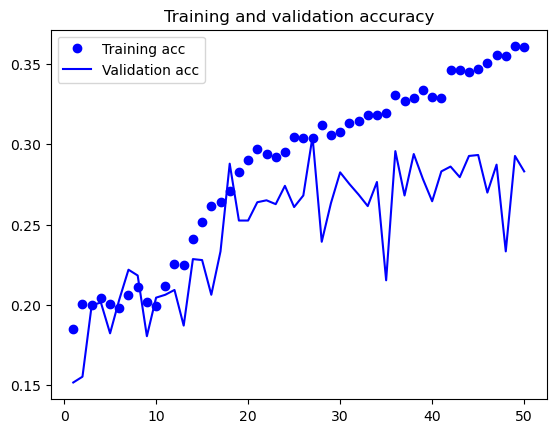

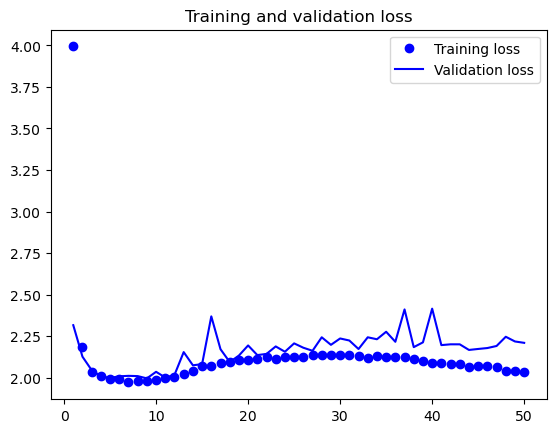

In [21]:
history_dict = history.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Creating a validation plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Creating a accuracy plot
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()